In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

In [2]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)
overlap = read.table('./overlap.txt',header =T)
data = data[!duplicated(data$Gene_name),]
head(data,2)
expr = data %>%  tibble::remove_rownames() %>% filter(Gene_name %in% overlap$GeneName) %>%  
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame()
Group = c(rep('con',31),rep('CI',43))
colnames(expr) = gsub('-','.',colnames(expr))
colnames(expr)
head(expr,2)
Type = ifelse(Group == 'CI',1,0)
nn = cbind(Type,expr)

Warning message:
"package 'openxlsx' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


[1] "ZNF480"   "ZNF354A"  "ZNF208"   "ZBED5"    "XRCC4"    "VCL"     
 [7] "TXN"      "TLN1"     "TFEC"     "TAF7"     "SYCP2"    "SUMO4"   
[13] "STON2"    "SPON2"    "SPOCD1"   "SH3TC2"   "SH2D2A"   "SCN9A"   
[19] "SAMD9"    "RPL34"    "RASD2"    "PTPRS"    "PRF1"     "POLR2K"  
[25] "PITPNM2"  "PILRB"    "PER1"     "PDGFA"    "PCDH1"    "OSBPL7"  
[31] "OSBPL5"   "NID1"     "NCR3"     "MLC1"     "MAP1A"    "LSM3"    
[37] "LPAR6"    "LMNA"     "KIR2DL1"  "KIFC3"    "IL2RB"    "IGJ"     
[43] "HCFC1"    "GPR56"    "GNLY"     "GAPT"     "FSD1"     "FOSB"    
[49] "FLNA"     "FAM200B"  "F2R"      "EVI2A"    "ERBB2"    "DUSP2"   
[55] "DDIT4"    "DAB2"     "CSTA"     "CLSTN1"   "CLEC2B"   "CARNS1"  
[61] "CACNA2D2" "BZRAP1"   "BMP6"     "BCL2A1"   "BAI2"     "ATP1A3"  
[67] "ATG2A"    "ARVCF"    "ARHGAP6"

,ZNF480,ZNF354A,ZNF208,ZBED5,XRCC4,VCL,TXN,TLN1,TFEC,TAF7,...,CARNS1,CACNA2D2,BZRAP1,BMP6,BCL2A1,BAI2,ATP1A3,ATG2A,ARVCF,ARHGAP6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,5.156136,5.125855,0.5392760,10.32473,2.339176,46.57527,7.655688,101.2624,3.548980,14.05923,...,2.390462,2.652530,3.472469,5.936213,22.32717,0.2332996,0.8470702,13.04633,0.8559196,1.176161
C11,5.341337,6.072094,0.3636642,10.90038,2.871262,51.53112,17.794071,101.7559,5.233879,18.91710,...,2.103993,4.407767,5.835689,3.418444,32.12134,0.1628312,0.9373913,15.02437,0.8992942,1.233943


In [3]:
dcaData = nn[,c('Type','FAM200B','BCL2A1','IGJ','TXN')]

In [4]:
head(dcaData,3)

,Type,FAM200B,BCL2A1,IGJ,TXN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,0,4.886505,22.32717,21.40125,7.655688
C11,0,6.201921,32.12134,21.30293,17.794071
C12,0,5.778473,20.78413,22.04342,13.325481


In [5]:
write.csv(dcaData,file = 'model.csv',quote = F)

In [6]:
library(rmda)
library(ggDCA)
library(ggplot2)
library(rms)
library(caret)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'rmda'


The following object is masked _by_ '.GlobalEnv':

    dcaData


Loading required package: ggplot2

Warning message:
"package 'rms' was built under R version 4.2.3"
Loading required package: Hmisc


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"


In [7]:
set.seed(123)
FAM200B.model <- decision_curve(Type ~ FAM200B, data = dcaData,
    thresholds = seq(0, 1, by = 0.005), bootstraps = 10)
BCL2A1.model <- decision_curve(Type ~ BCL2A1, data = dcaData,
    thresholds = seq(0, 1, by = 0.005), bootstraps = 10)
IGJ.model <- decision_curve(Type ~ IGJ, data = dcaData,
    thresholds = seq(0, 1, by = 0.005), bootstraps = 10)
TXN.model <- decision_curve(Type ~ TXN, data = dcaData,
    thresholds = seq(0, 1, by = 0.005), bootstraps = 10)


In [8]:
set.seed(123)
full.model <- decision_curve(Type~FAM200B+BCL2A1 +IGJ +TXN ,
                             data = dcaData,
                             thresholds = seq(0, 1, by = .005),
                             bootstraps = 10)

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 



In [9]:
pdf('./fig/QC2.pdf',width = 6,height = 6)
plot_decision_curve( list(FAM200B.model,BCL2A1.model,IGJ.model, TXN.model,full.model),
                    curve.names = c('FAM200B.model','BCL2A1.model','IGJ.model',
                                    'TXN.model','full.model'),
                    col = ggsci::pal_npg("nrc")(5),
                    confidence.intervals = FALSE,  #remove confidence intervals
                    cost.benefit.axis = FALSE, #remove cost benefit axis
                    legend.position = "topright") #add the legend
dev.off()

Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



png 
  2

Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



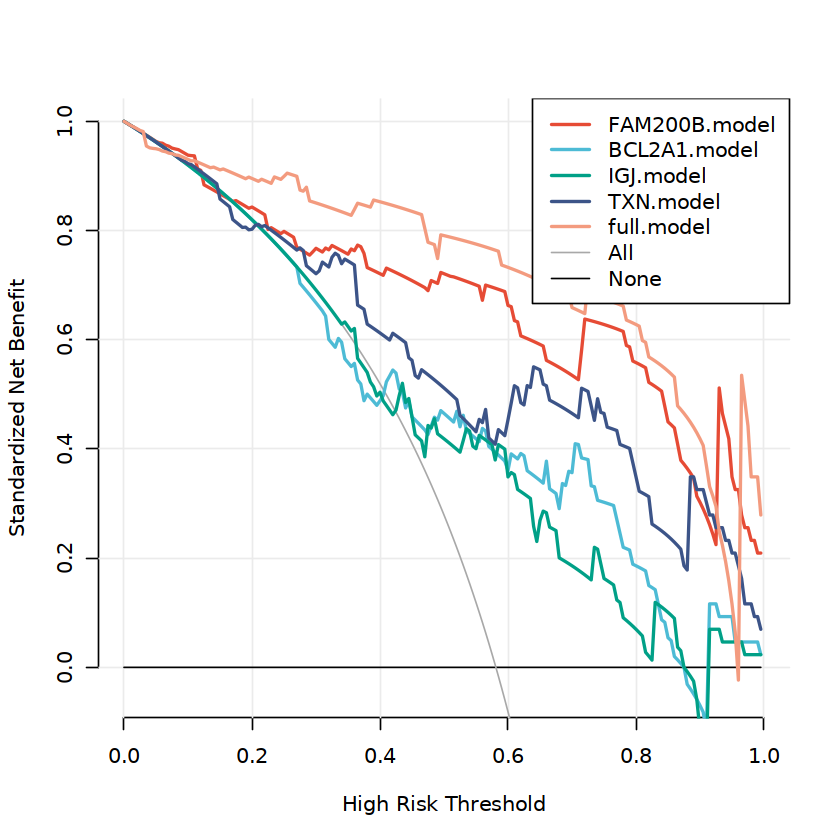

In [10]:
plot_decision_curve( list(FAM200B.model,BCL2A1.model,IGJ.model, TXN.model,full.model),
                    curve.names = c('FAM200B.model','BCL2A1.model','IGJ.model',
                                    'TXN.model','full.model'),
                    col = ggsci::pal_npg("nrc")(5),
                    lwd = 2,
                    confidence.intervals = FALSE,  #remove confidence intervals
                    cost.benefit.axis = FALSE, #remove cost benefit axis
                    legend.position = "topright") #add the legend